In [1]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data40.csv")
df.head()

,X,Y,Z,Acceleration,Timestamp
0,0.38805,3.33495,9.103050,9.702474,4441468315016
1,0.22305,3.39705,9.321000,9.923243,4441487381393
2,0.24000,3.34695,9.450001,10.028070,4441506447578
3,0.28500,3.30600,9.586950,10.144973,4441525513732
4,0.15795,3.29595,9.718950,10.263831,4441544579970


In [3]:
df["Time Elapsed"] = ((df["Timestamp"]-df["Timestamp"][0])/1000000)
df["Acceleration"] = df["Acceleration"]-9.8
df.head()

,X,Y,Z,Acceleration,Timestamp,Time Elapsed
0,0.38805,3.33495,9.103050,-0.097526,4441468315016,0.000000
1,0.22305,3.39705,9.321000,0.123243,4441487381393,19.066377
2,0.24000,3.34695,9.450001,0.228070,4441506447578,38.132562
3,0.28500,3.30600,9.586950,0.344973,4441525513732,57.198716
4,0.15795,3.29595,9.718950,0.463831,4441544579970,76.264954


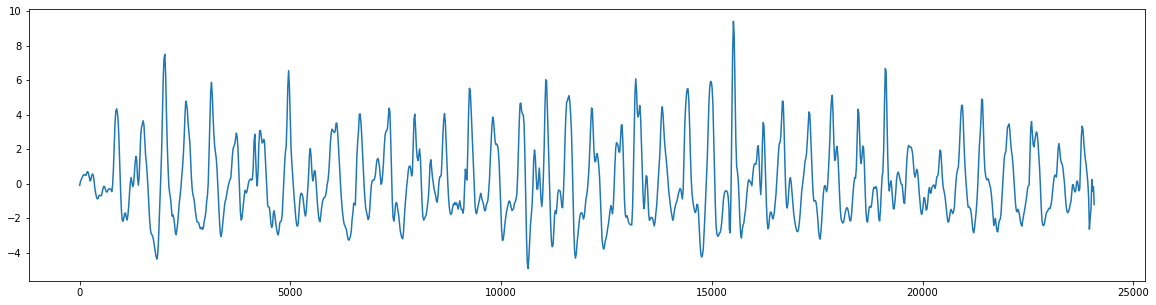

In [4]:
plt.figure(figsize=(20,5))
plt.plot(df["Time Elapsed"], df["Acceleration"])
plt.show()

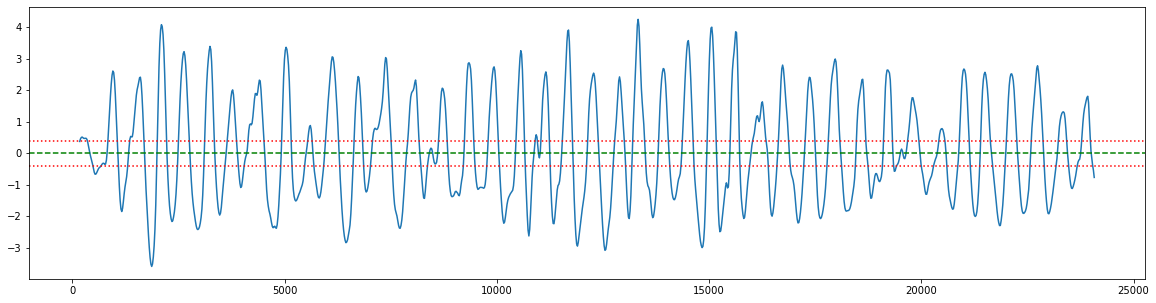

In [31]:
#Do Thresholds
base = 0
margin = 0.4
rolling_mean_window = 10

high_thres = base+margin
low_thres = base-margin

#Smooth the Graph
rolling = df["Acceleration"].rolling(window=rolling_mean_window)
rolling_mean = rolling.mean()
df["Smooth Accel"] = rolling_mean

X = df["Time Elapsed"]
Y = df["Smooth Accel"]

plt.figure(figsize=(20,5))
plt.plot(X, Y)
plt.axhline(y=base, color="green", linestyle='--')
plt.axhline(y=high_thres, color="red", linestyle=':')
plt.axhline(y=low_thres, color="red", linestyle=':')
plt.show()

In [32]:
valleys_indexes = (np.diff(np.sign(np.diff(Y))) > 0).nonzero()[0] + 1      # local min
peaks_indexes = (np.diff(np.sign(np.diff(Y))) < 0).nonzero()[0] + 1       # local max
# +1 due to the fact that diff reduces the original index number

v_x = X[valleys_indexes].reset_index(drop=True)#valleys x values
p_x = X[peaks_indexes].reset_index(drop=True)#peaks x values
v_y = Y[valleys_indexes].reset_index(drop=True)#valleys y values
p_y = Y[peaks_indexes].reset_index(drop=True)#valleys y values

#If the first point is a peak, remove that peak and let valleys go first
if p_x[0] < v_x[0]:
    p_x = p_x.drop(index=p_x.index[0], axis=0).reset_index(drop=True)
    p_y = p_y.drop(index=p_y.index[0], axis=0).reset_index(drop=True)
    
intercepts = []
for i in range(min(len(v_x),len(p_x))):
    v = [v_x[i], v_y[i]]
    p = [p_x[i], p_y[i]] 
    x1 = v[0]
    x2 = p[0]
    y1 = v[1]
    y2 = p[1]
    if y1 < low_thres and y2 > high_thres:
        m = ((y2-y1)/(x2-x1))
        c = -(m*x1)+y1
        intercepts.append(-c/m)
        #print(f"{v}, {p}, {(-(m*-x1)+(y1))/m}")
        
len(intercepts)

37

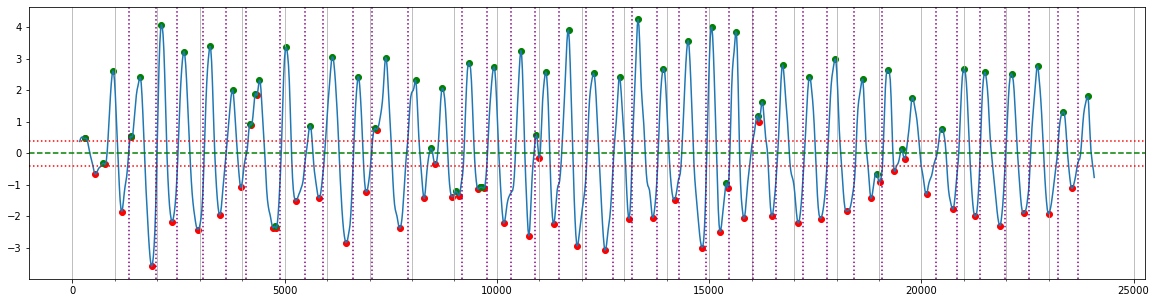

In [33]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 1, 1)
minor_tick = []
for i in range(0, int(max(p_x)), 1000):
    minor_tick.append(i)
plt.plot(X, Y)
ax.set_xticks(minor_tick, minor=True)
plt.grid(axis="x", which="both")
plt.scatter(x=v_x, y=v_y, color="red")
plt.scatter(x=p_x, y=p_y, color="green")
plt.axhline(y=base, color="green", linestyle='--')
plt.axhline(y=high_thres, color="red", linestyle=':')
plt.axhline(y=low_thres, color="red", linestyle=':')
for i in intercepts:
    plt.axvline(x=i, color="purple", linestyle=":")
plt.show()